## Imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [13]:
df = pd.read_json('../../data/raw/human.jsonl', lines=True)

## Article topic extraction

In [17]:
def extract_topic(id):
    try:
        dash_indices = [i for i, char in enumerate(id) if char == '-']
        second_last_dash_index = dash_indices[-2]
        last_slash_index = id.rindex('/')
        
        # Extract the text between the second-to-last "-" and the last "/"
        result = id[second_last_dash_index + 1:last_slash_index]
        return result
    except ValueError:
        # In case "-" or "/" are not found, return None
        return None

In [18]:
df['topic'] = df['id'].apply(extract_topic)
df

,id,text,topic
0,articles-cleaned-truncated/news-2021-01-01-202...,Inaugural Address by President Joseph R. Biden...,bideninauguration
1,articles-cleaned-truncated/news-2021-01-01-202...,Fact check: Biden inauguration impacted by pan...,bideninauguration
2,articles-cleaned-truncated/news-2021-01-01-202...,Highlights from Joe Biden's 2021 inauguration\...,bideninauguration
3,articles-cleaned-truncated/news-2021-01-01-202...,"Biden takes the helm, appeals for unity to tak...",bideninauguration
4,articles-cleaned-truncated/news-2021-01-01-202...,'The Hill We Climb': Read Amanda Gorman's inau...,bideninauguration
...,...,...,...
1082,articles-cleaned-truncated/news-2021-01-01-202...,How amateur detectives on social media helped ...,wyominggabbypetito
1083,articles-cleaned-truncated/news-2021-01-01-202...,Authorities searching for missing 22-year-old ...,wyominggabbypetito
1084,articles-cleaned-truncated/news-2021-01-01-202...,Univ. of Wisconsin Oshkosh student helping Gab...,wyominggabbypetito
1085,articles-cleaned-truncated/news-2021-01-01-202...,Did the Internet Actually Help Find Gabby Peti...,wyominggabbypetito


## Build bar chart

In [34]:
x = df['topic'].unique()

x.sort()
# Generated by ChatGPT based on sorted x
x_human_readable = [
        'Biden Inauguration', 'Capitol Riot', 'Citibank $500 Million Mistake', 'CNN Chris Cuomo', 
        'Colin Powell Dead', 'Colonial Pipeline Hack', 'COVID-19', 'Ever Given Suez Canal', 
        'Facebook Outage', 'George Floyd Derek Chauvin Trial', 'Harry and Meghan', 'Hurricane Ida', 
        'Kabul Airport Attack', 'Kamala Harris Vice President', 'Kyle Rittenhouse Not Guilty', 
        'Michigan High School Shooting', 'Rust Movie Set Shooting', 'Stimulus Check', 
        'Tiger Woods Accident', 'Tom Brady Super Bowl', 'Trump Impeachment', 'Twitter Bans Trump', 
        'Winter Storm Texas', 'Wyoming Gabby Petito'
    ]
print(x)
y = [0] * len(x)
for i, topic in enumerate(x):
    y[i] = y[i] + (df.topic == topic).sum()

['bideninauguration' 'capitolriot' 'citibank500millionmistake'
 'cnnchriscuomo' 'colinpowelldead' 'colonialpipelinehack' 'covid19'
 'evergreensuezcanal' 'facebookoutage' 'georgefloydderekchauvin'
 'harryandmeghan' 'hurricaneida' 'kabulairportattack'
 'kamalaharrisvicepresident' 'kylerittenhousenotguilty'
 'michiganhighschoolshooting' 'rustmoviesetshooting' 'stimuluscheck'
 'tigerwoodsaccident' 'tombradysuperbowl' 'trumpimpeachment'
 'twitterbanstrump' 'winterstormtexas' 'wyominggabbypetito']


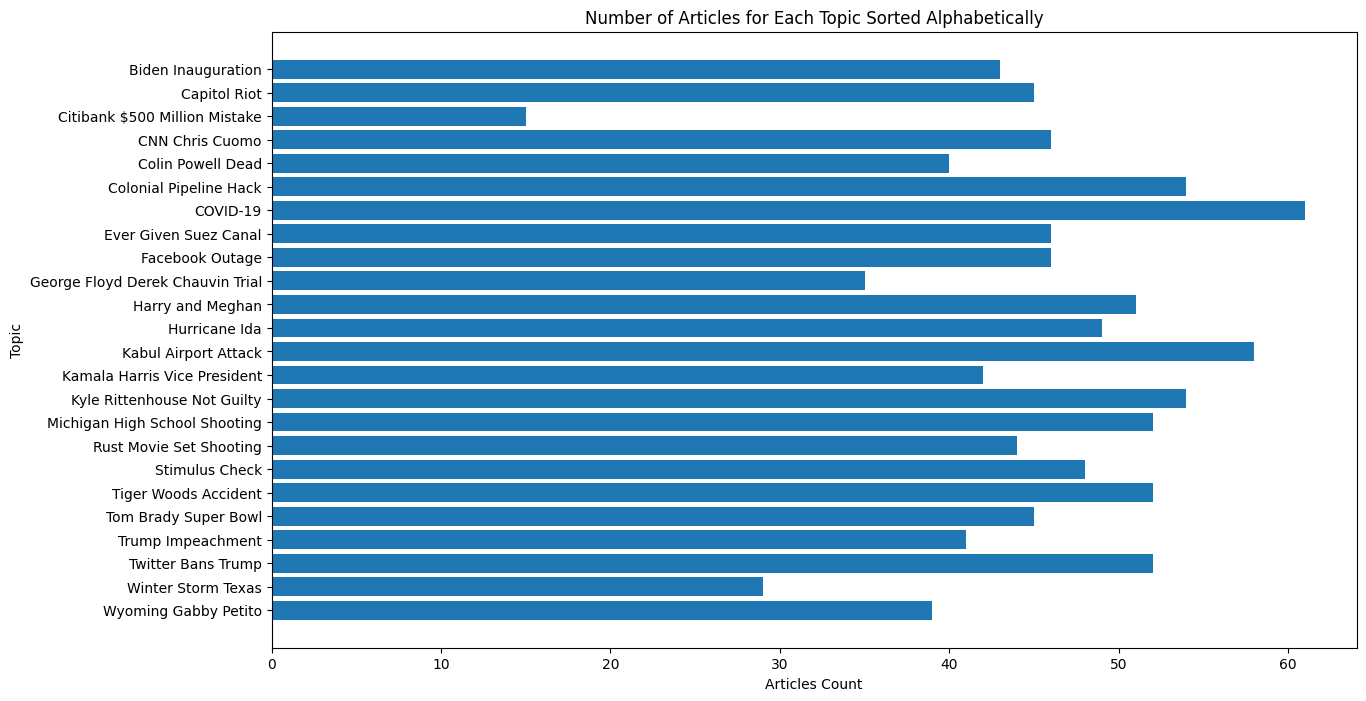

In [63]:
plt.figure(figsize=(14, 8))
plt.barh(x_human_readable, y)
plt.xlabel('Articles Count')
plt.ylabel('Topic')
plt.title('Number of Articles for Each Topic Sorted Alphabetically')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()